In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
state_abbr = ['AK', 'AL', 'AZ', 'AR', 'CA',
              'CO', 'CT', 'DE', 'FL', 'GA',
              'HI', 'ID', 'IL', 'IN', 'IA',
              'KS', 'KY', 'LA', 'ME', 'MD',
              'MA', 'MI', 'MN', 'MS', 'MO',
              'MT', 'NE', 'NV', 'NH', 'NJ',
              'NM', 'NY', 'NC', 'ND', 'OH',
              'OK', 'OR', 'PA', 'RI', 'SC',
              'SD', 'TN', 'TX', 'UT', 'VT',
              'VA', 'WA', 'WV', 'WI', 'WY'
             ]

In [3]:
deaths_true = pd.read_csv('../Data/Clean/deaths_NCHS_processed.csv')
# deaths_no_travel = pd.read_csv('deceased_df_no_air_travel.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
# deaths_travel = pd.read_csv('deceased_df_real_data.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
# deaths_travel_2 = pd.read_csv('deceased_df_real_data_2.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
deaths_no_travel = pd.read_csv('deceased_df_no_travel_real_data_3.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
deaths_travel_3 = pd.read_csv('deceased_df_real_data_3.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]

In [4]:
# deaths_true.drop('Week', axis=1, inplace=True)
deaths_no_travel.drop('unnamed', axis=1, inplace=True)
# deaths_travel.drop('unnamed', axis=1, inplace=True)
# deaths_travel_2.drop('unnamed', axis=1, inplace=True)
deaths_travel_3.drop('unnamed', axis=1, inplace=True)

In [5]:
deaths_true.head(3)

,State,DeathsFromPneumoniaAndInfluenza,Year,Week,Quarter,Month
0,AK,3.0,2009,40,4,10
1,AK,3.0,2009,41,4,10
2,AK,3.0,2009,42,4,10


In [6]:
grouped = deaths_true.groupby(['Year', 'Quarter']).sum()

In [7]:
grouped

DeathsFromPneumoniaAndInfluenza   Week  Month
Year Quarter                                               
2009 4                                52079.0  31096   7384
2010 1                                55438.0   4732   1300
     2                                44634.0  13520   3380
     3                                40001.0  22308   5356
     4                                48380.0  31096   7384
2011 1                                62435.0   4732   1300
     2                                47370.0  13520   3328
     3                                40068.0  22308   5356
     4                                46802.0  31096   7384
2012 1                                54535.0   4732   1300
     2                                44233.0  13520   3276
     3                                39655.0  22308   5304
     4                                48253.0  31096   7332
2013 1                                68417.0   4732   1404
     2                                44882.0  13520   3432
     3                                38656.0  22308   5408
     4                                45352.0  31096   7436
2014 1                                59688.0   4732   1404
     2                                44211.0  13520   3380
     3                                38166.0  22308   5408
     4                                51957.0  33852   7488
2015 1                                66007.0   4732   1300
     2                                45139.0  13520   3380
     3                                38754.0  22308   5408
     4                                44193.0  31096   7384
2016 1                                55948.0   4732   1300
     2                                43982.0  13520   3328
     3                                37702.0  22308   5356
     4                                44514.0  31096   7384
2017 1                                61708.0   4732   1300
     2                                43509.0  13520   3328
     3                                36844.0  22308   5356
     4                                46202.0  31096   7332
2018 1                                72039.0   4732   1404
     2                                41741.0  13520   3432
     3                                35404.0  22308   5460
     4                                41732.0  31096   7488
2019 1                                45254.0   4056   1248

In [8]:
deaths_no_travel['total_deaths'] = deaths_no_travel.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [9]:
deaths_no_travel

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,36,5,56,20,289,43,29,3,...,53,231,17,4,55,55,20,48,4,2397
2,2010,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,5,7
3,2010,2,8,5,12,8,26,5,6,1,...,9,27,7,4,8,6,3,12,5,451
4,2010,3,10,3,13,7,44,3,2,10,...,14,32,4,4,11,8,4,7,5,453
5,2010,4,7,6,8,7,26,5,7,2,...,8,24,4,2,10,11,3,6,10,435
6,2011,1,0,4,0,0,0,0,0,3,...,0,0,0,6,0,0,0,0,3,27
7,2011,2,6,6,5,5,8,2,4,2,...,6,7,8,9,4,5,5,10,6,290
8,2011,3,4,6,5,2,4,4,9,2,...,3,7,0,3,8,8,10,6,6,234
9,2011,4,10,2,5,7,12,6,9,5,...,1,7,7,5,5,8,5,6,5,268
10,2012,1,1,3,1,3,0,1,5,9,...,0,0,1,3,0,2,3,1,6,86


In [10]:
deaths_travel_3['total_deaths'] = deaths_travel_3.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [11]:
deaths_travel_3.head(3)

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,1498,86,8321,626,58136,8052,1223,7,...,6358,49488,2388,63,10052,6685,132,3500,34,337093
2,2010,1,18,0,218,5,1633,289,48,0,...,158,1264,98,28,362,155,4,126,2,9891
3,2010,2,439,116,3032,242,18541,3536,444,4,...,2022,18464,1043,64,3498,2252,75,1159,35,116903


In [12]:
# deaths_travel_2['total_deaths'] = deaths_travel_2.drop(['Year', 'Quarter'], axis=1).sum(axis=1)
deaths_travel_3['total_deaths'] = deaths_travel_3.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [13]:
deaths_travel_3

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,1498,86,8321,626,58136,8052,1223,7,...,6358,49488,2388,63,10052,6685,132,3500,34,674186
2,2010,1,18,0,218,5,1633,289,48,0,...,158,1264,98,28,362,155,4,126,2,19782
3,2010,2,439,116,3032,242,18541,3536,444,4,...,2022,18464,1043,64,3498,2252,75,1159,35,233806
4,2010,3,648,252,3132,393,16578,3253,684,6,...,2487,15025,1318,134,3449,2593,129,1558,119,233728
5,2010,4,614,120,3325,401,16800,3336,642,4,...,2436,15923,1312,124,3648,2228,140,1422,71,235402
6,2011,1,53,4,348,26,1202,340,64,1,...,219,1086,174,49,384,246,25,137,3,19922
7,2011,2,306,137,1720,214,5893,2094,349,2,...,1180,6910,750,86,1680,1109,72,741,54,107820
8,2011,3,400,200,1671,304,5391,1984,480,5,...,1199,5584,890,131,1697,1234,130,865,120,108144
9,2011,4,364,127,1741,269,5314,1932,439,3,...,1231,5903,927,105,1695,1176,110,857,61,106998
10,2012,1,84,67,457,50,1647,579,91,4,...,282,2095,286,54,704,409,34,176,29,35578


Text(0.5, 1.0, 'Total number of deaths per quarter')

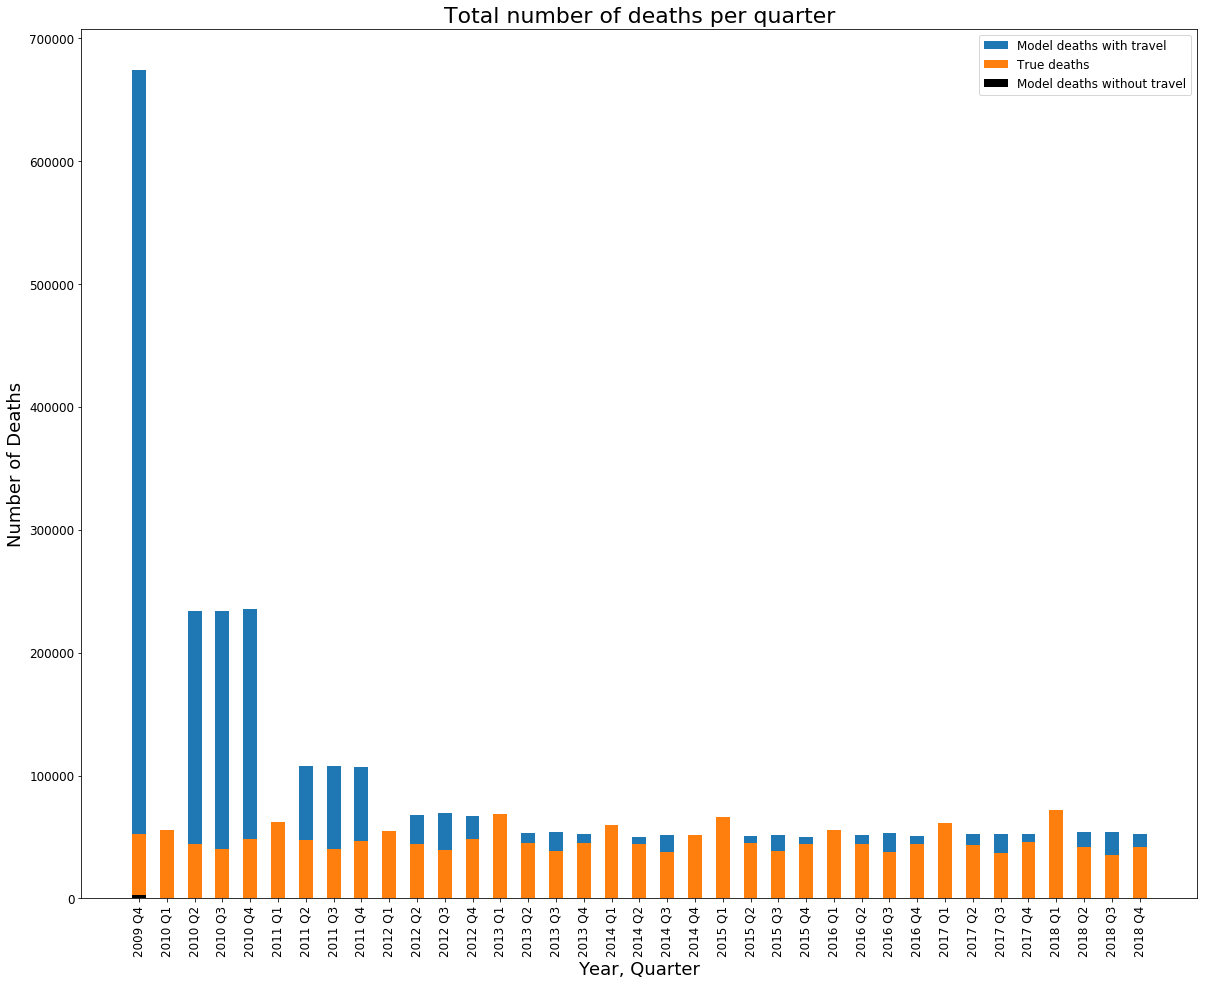

In [21]:
plt.figure(figsize=[20,16])
ind = np.arange(37)
width = 0.5
p1 = plt.bar(ind, deaths_travel_3['total_deaths'], width,)
#              bottom=grouped['DeathsFromPneumoniaAndInfluenza'][-1], color='grey')
#              bottom=deaths_no_travel['total_deaths'], color='grey')
#              bottom=menMeans, yerr=womenStd)
p2 = plt.bar(ind, grouped['DeathsFromPneumoniaAndInfluenza'][:-1], width,)
#              bottom=deaths_travel_3['total_deaths'], color='black')
#              bottom=deaths_travel_3['total_deaths'], color='black')
p3 = plt.bar(ind, deaths_no_travel['total_deaths'], width, color='black')

plt.xticks(ind, ('2009 Q4',
                '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4',
                '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4',
                '2012 Q1', '2012 Q2', '2012 Q3', '2012 Q4',
                '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4',
                '2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4',
                '2015 Q1', '2015 Q2', '2015 Q3', '2015 Q4',
                '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4',
                '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4',
                '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4'), rotation=90)
# plt.yticks(np.arange(0, 81, 10))
# plt.xticks(rotation=70)
plt.legend((p1[0], p2[0], p3[0]), ('Model deaths with travel', 'True deaths', 'Model deaths without travel'), fontsize='12')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Year, Quarter", fontsize=18)
plt.ylabel("Number of Deaths", fontsize=18)
plt.title("Total number of deaths per quarter", fontsize=22)

In [15]:
grouped['DeathsFromPneumoniaAndInfluenza'][:-1]

Year  Quarter
2009  4          52079.0
2010  1          55438.0
      2          44634.0
      3          40001.0
      4          48380.0
2011  1          62435.0
      2          47370.0
      3          40068.0
      4          46802.0
2012  1          54535.0
      2          44233.0
      3          39655.0
      4          48253.0
2013  1          68417.0
      2          44882.0
      3          38656.0
      4          45352.0
2014  1          59688.0
      2          44211.0
      3          38166.0
      4          51957.0
2015  1          66007.0
      2          45139.0
      3          38754.0
      4          44193.0
2016  1          55948.0
      2          43982.0
      3          37702.0
      4          44514.0
2017  1          61708.0
      2          43509.0
      3          36844.0
      4          46202.0
2018  1          72039.0
      2          41741.0
      3          35404.0
      4          41732.0
Name: DeathsFromPneumoniaAndInfluenza, dtype: float64

In [16]:
deaths_travel_3['total_deaths']

1     674186
2      19782
3     233806
4     233728
5     235402
6      19922
7     107820
8     108144
9     106998
10     35578
11     68102
12     69362
13     67234
14     45516
15     53208
16     53922
17     52472
18     47260
19     50228
20     51600
21     49268
22     47944
23     51014
24     51832
25     50292
26     48338
27     51700
28     52950
29     50824
30     48238
31     52188
32     52808
33     52150
34     48998
35     54286
36     53942
37     52422
Name: total_deaths, dtype: int64

In [17]:
grouped['DeathsFromPneumoniaAndInfluenza'][-1]

45254.0

In [40]:
CA_deaths_true = deaths_true[(deaths_true['State'] == 'CA')].groupby(['State', 'Year', 'Quarter']).sum()
CO_deaths_true = deaths_true[(deaths_true['State'] == 'CO')].groupby(['State', 'Year', 'Quarter']).sum()
WY_deaths_true = deaths_true[(deaths_true['State'] == 'WY')].groupby(['State', 'Year', 'Quarter']).sum()

In [41]:
CA_deaths_true = CA_deaths_true['DeathsFromPneumoniaAndInfluenza']
CO_deaths_true = CO_deaths_true['DeathsFromPneumoniaAndInfluenza']
WY_deaths_true = WY_deaths_true['DeathsFromPneumoniaAndInfluenza']

Text(0.5, 1.0, 'Total number of deaths per state over all quarters')

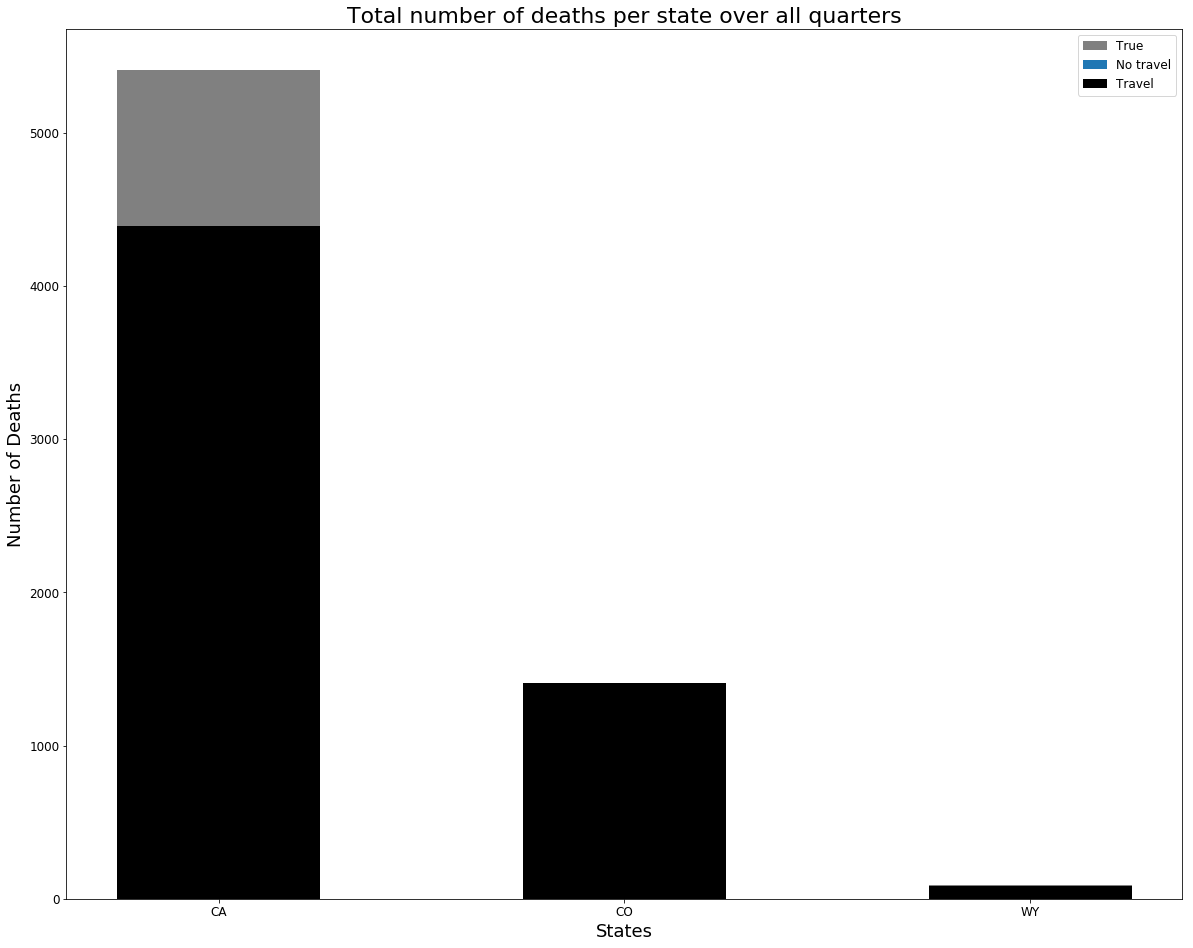

In [55]:
plt.figure(figsize=[20,16])
ind = np.arange(3)
width = 0.5

# CA = [np.mean(CA_deaths_true[:-1]), np.mean(deaths_no_travel['CA']), np.mean(deaths_travel_2['CA'])]
# CO = [np.mean(CO_deaths_true[:-1]), np.mean(deaths_no_travel['CO']), np.mean(deaths_travel_2['CO'])]
# WY = [np.mean(WY_deaths_true[:-1]), np.mean(deaths_no_travel['WY']), np.mean(deaths_travel_2['WY'])]

true = [np.mean(CA_deaths_true[:-1]), np.mean(CO_deaths_true[:-1]), np.mean(WY_deaths_true[:-1])]
no_travel = [np.mean(deaths_no_travel['CA']), np.mean(deaths_no_travel['CO']), np.mean(deaths_no_travel['WY'])]
travel = [np.mean(deaths_travel_3['CA']), np.mean(deaths_travel_3['CO']), np.mean(deaths_travel_3['WY'])]

p1 = plt.bar(ind, true, width, color='grey')
p2 = plt.bar(ind, no_travel, width)
#              bottom=menMeans, yerr=womenStd)
p3 = plt.bar(ind, travel, width, color='black')

plt.xticks(ind, ('CA', 'CO', 'WY'), size=12)
# plt.xticks(rotation=70)
plt.legend((p1[0], p2[0], p3[0]), ('True', 'No travel', 'Travel'), fontsize=12)
plt.yticks(size=12)
plt.xlabel("States", fontsize=18)
plt.ylabel("Number of Deaths", fontsize=18)
plt.title("Total number of deaths per state over all quarters", fontsize=22)